In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from scipy.spatial.distance import pdist,squareform
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
X = mnist.data / 255.0
y = mnist.target 

print(X.shape,y.shape)


(70000, 784) (70000,)


In [3]:
print(X.shape[1])

784


In [4]:
import pandas as pd

feat_cols = ['pixel' + str(i) for i in range(X.shape[1])]
df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i:str(i))
X, y = None,None
print('Size of the dataframe: {}'.format(df.shape))
df

Size of the dataframe: (70000, 785)


pixel0  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  label
0         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0      5
1         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0      0
2         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0      4
3         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0      1
4         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0      9
...       ...     ...     ...     ...  ...       ...       ...       ...    ...
69995     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0      2
69996     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0      3
69997     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0      4
69998     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0      5
69999     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0      6

[70000 rows x 785 columns]

In [5]:
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

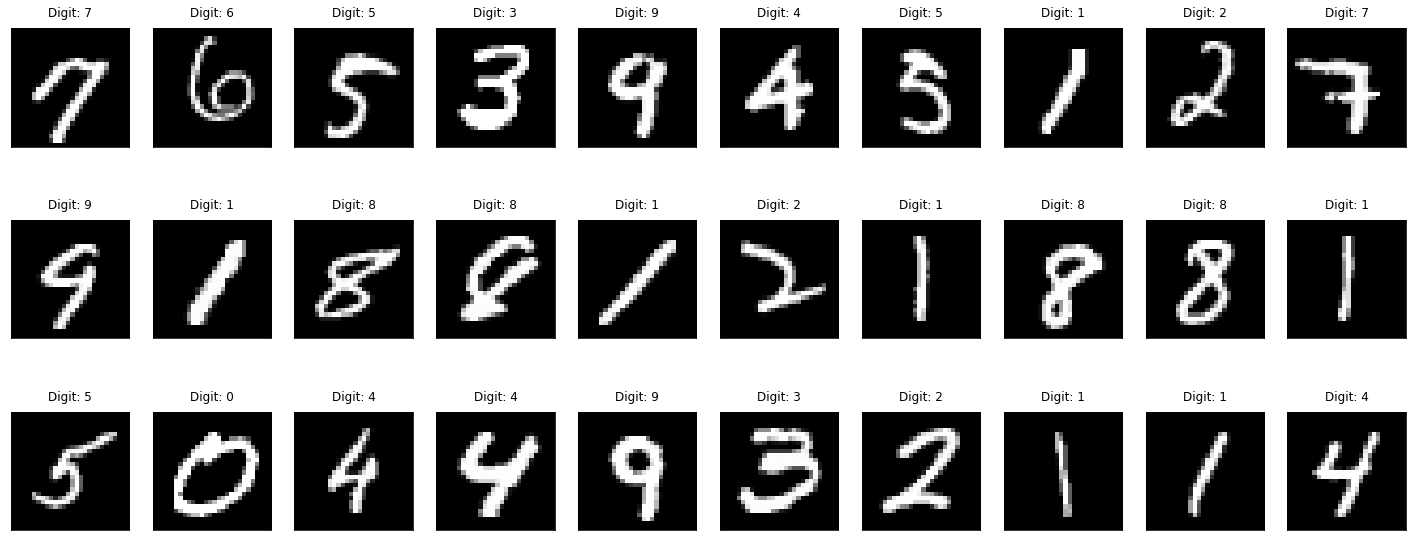

In [6]:
import matplotlib.pyplot as plt

plt.gray()
fig = plt.figure(figsize=(25,10))

for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1,title='Digit: '+ str(df.loc[rndperm[i],'label']))
   # print(type(df.loc[rndperm[i],feat_cols].values))
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape(((28),28)).astype(float))
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

plt.show()

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
print(pca_result.shape)

df['pca_one'] = pca_result[:,0]
df['pca_two'] = pca_result[:,1]
df['pca-three'] = pca_result[:,2]
df

print('Explained varation per priciple component: {}'.format(pca.explained_variance_ratio_))


(70000, 3)
Explained varation per priciple component: [0.09746116 0.07155445 0.06149531]


In [8]:
df

pixel0  pixel1  pixel2  pixel3  ...  label   pca_one   pca_two  pca-three
0         0.0     0.0     0.0     0.0  ...      5  0.479429 -1.240086  -0.200229
1         0.0     0.0     0.0     0.0  ...      0  3.962722 -1.137120   2.259287
2         0.0     0.0     0.0     0.0  ...      4 -0.231358  1.543914  -0.635297
3         0.0     0.0     0.0     0.0  ...      1 -3.125352 -2.382037   1.159022
4         0.0     0.0     0.0     0.0  ...      9 -1.534585  2.861940   0.054321
...       ...     ...     ...     ...  ...    ...       ...       ...        ...
69995     0.0     0.0     0.0     0.0  ...      2  1.198798 -2.155457  -0.087537
69996     0.0     0.0     0.0     0.0  ...      3  2.232101 -2.741278  -3.271870
69997     0.0     0.0     0.0     0.0  ...      4 -1.064734  2.314053   1.338762
69998     0.0     0.0     0.0     0.0  ...      5 -1.216566 -0.457778   2.492957
69999     0.0     0.0     0.0     0.0  ...      6  4.152399 -0.327013   2.867931

[70000 rows x 788 columns]

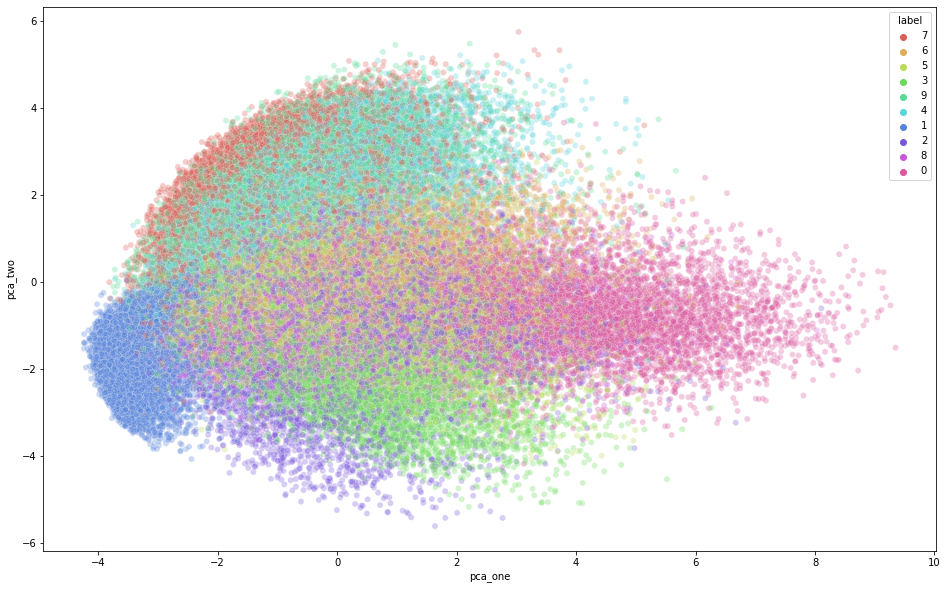

In [9]:
plt.figure(figsize=(16,10))

import seaborn as sns

sns.scatterplot(
    x="pca_one", y = "pca_two",
    hue = 'label',
    palette=sns.color_palette("hls",10),
    data = df.loc[rndperm,:],
    legend = "full",
    alpha = 0.3
)

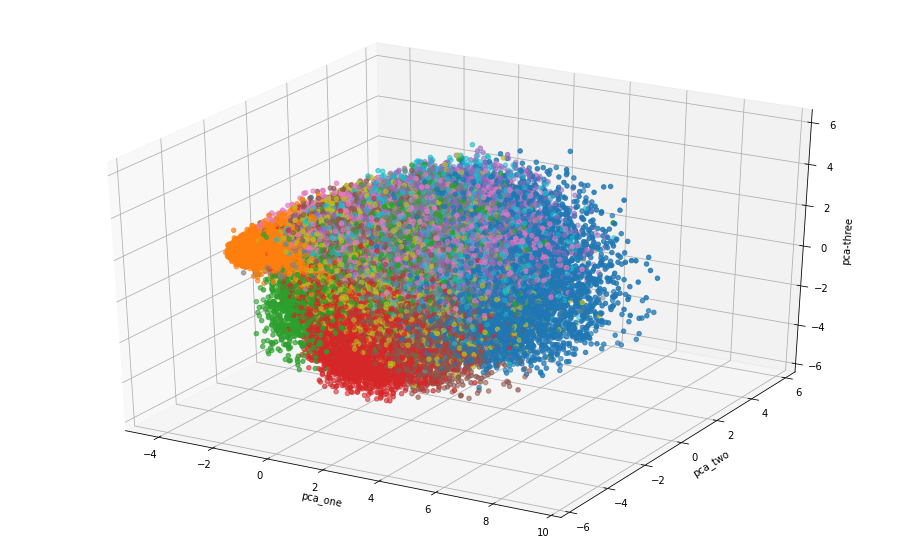

In [10]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca_one"],
    ys = df.loc[rndperm,:]["pca_two"],
    zs = df.loc[rndperm,:]["pca-three"],
    c = df.loc[rndperm,:]['label'].astype(int),
    cmap='tab10'
)
ax.set_xlabel('pca_one')
ax.set_ylabel('pca_two')
ax.set_zlabel('pca-three')
plt.show()

In [11]:
N = 10000

df_subset = df.loc[rndperm[:N],:].copy()
print(df_subset.shape)

data_subeset = df_subset[feat_cols].values

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subeset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


(10000, 788)
Explained variation per principal component: [0.09786323 0.07103737 0.06156952]


In [12]:
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1,perplexity= 40, n_iter = 300)
tsne_results = tsne.fit_transform(data_subeset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 2.196s...
[t-SNE] Computed neighbors for 10000 samples in 150.492s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.129510
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.745735
[t-SNE] KL divergence after 300 iterations: 2.789977
t-SNE done! Time elapse

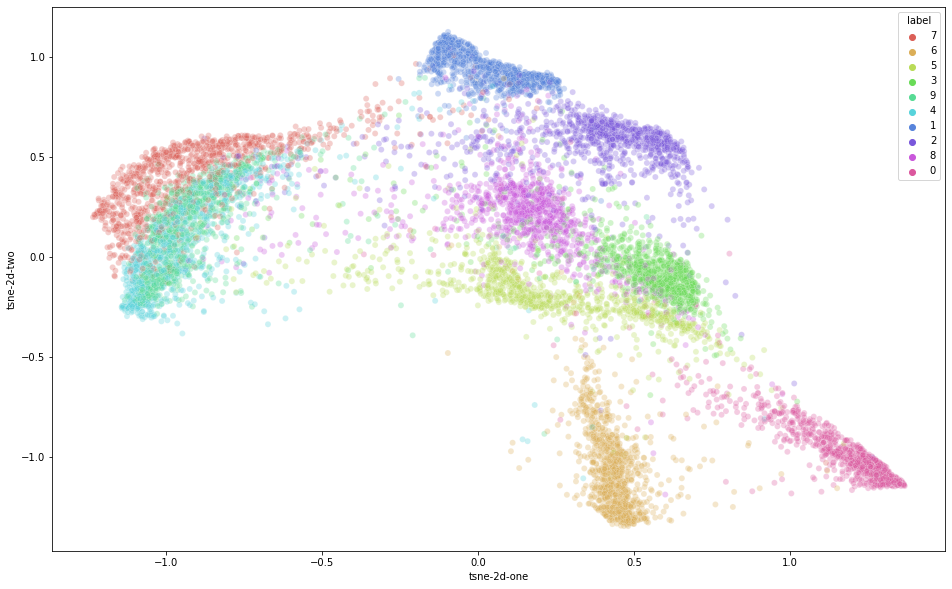

In [70]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette = sns.color_palette("hls",10),
    data = df_subset,
    legend = "full",
    alpha = 0.3
)

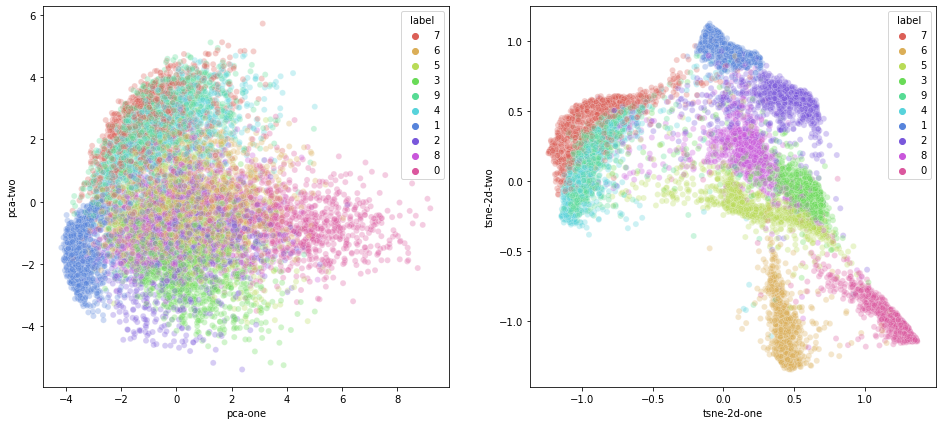

In [68]:
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1,2,1)

sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)


In [81]:
pca_50 = PCA(n_components=150)
pca_result_50 = pca_50.fit_transform(data_subeset)

print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.9491996491031958


In [86]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.181s...
[t-SNE] Computed neighbors for 10000 samples in 29.050s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.078972
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.547516
[t-SNE] KL divergence after 300 iterations: 2.791471
t-SNE done! Time elapsed

In [87]:
df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]

In [64]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

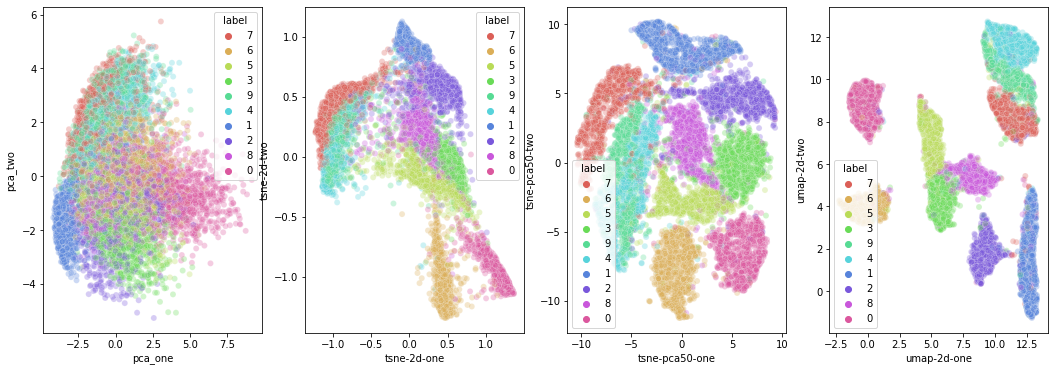

In [88]:
df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(18,6))
ax1 = plt.subplot(1, 4, 1)
sns.scatterplot(
    x="pca_one", y="pca_two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 4, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 4, 3)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)
ax4 = plt.subplot(1, 4, 4)
sns.scatterplot(
    x="umap-2d-one", y="umap-2d-two",
    hue="label",
    palette = sns.color_palette("hls",10),
    data = df_subset,
    legend = "full",
    alpha = 0.3
)

In [65]:
df_subset

pixel0  pixel1  pixel2  ...  tsne-pca50-two  tsne-2d-one  tsne-2d-two
57555     0.0     0.0     0.0  ...       -3.999928    -1.015101     0.454912
60100     0.0     0.0     0.0  ...       -6.967080     0.426537    -1.252611
26648     0.0     0.0     0.0  ...       -2.653106    -0.259320    -0.012804
13931     0.0     0.0     0.0  ...        8.020370     0.678775    -0.062460
13646     0.0     0.0     0.0  ...       -6.364281    -0.972970     0.032796
...       ...     ...     ...  ...             ...          ...          ...
44319     0.0     0.0     0.0  ...       -2.155344     0.420465    -0.810832
17414     0.0     0.0     0.0  ...        1.705921     0.376041    -0.258114
17538     0.0     0.0     0.0  ...        5.481525     0.099879     0.863012
57472     0.0     0.0     0.0  ...        3.871626     0.483754    -0.119721
65136     0.0     0.0     0.0  ...       -4.112280     0.541074    -1.223096

[10000 rows x 794 columns]

In [56]:
! pip uninstall umap
! pip install umap-learn

Found existing installation: umap 0.1.1
Uninstalling umap-0.1.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/umap-0.1.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/umap/*
Proceed (y/n)? y
  Successfully uninstalled umap-0.1.1
     |████████████████████████████████| 80 kB 3.6 MB/s 
     |████████████████████████████████| 1.1 MB 11.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=5c57dd92881b14f23c8515274620c5ce86f407b7208f5596c240d24011315783
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.4-py3-none-any.whl size=52373 sha256=de883e55e2be93ceb5ae4f8b5527f471d0f892d9fb2a8125798458548ac54a0c
  Stored in directory: /root/.cache/pip/wheels/d0/5b/62/3401692ddad12324249c774c4b15ccb046946021e2b581c043
Successfully built umap-learn pynndescent


In [60]:
import umap
import umap.umap_ as umap

In [67]:
reducer = umap.UMAP()

In [69]:
embedding = reducer.fit_transform(data_subeset)
embedding.shape

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(10000, 2)

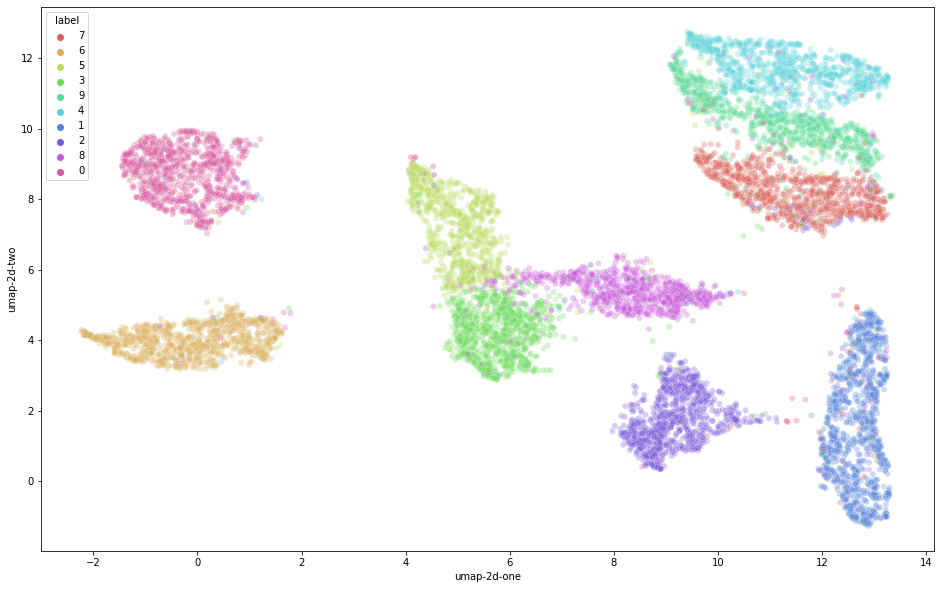

In [71]:
df_subset['umap-2d-one'] = embedding[:,0]
df_subset['umap-2d-two'] = embedding[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="umap-2d-one", y="umap-2d-two",
    hue="label",
    palette = sns.color_palette("hls",10),
    data = df_subset,
    legend = "full",
    alpha = 0.3
)

In [18]:
! pip install timm

     |████████████████████████████████| 376 kB 5.1 MB/s 


In [19]:
import timm
from torchvision.models import wide_resnet50_2
import torch.nn as nn
import torch
from torchvision import transforms

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [89]:
cnn = timm.create_model('wide_resnet50_2',pretrained=True,in_chans = 1)

cnn.eval()

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act3): ReLU(inplace=True)
      (downsample): 

In [118]:
cnn = timm.create_model('resnet34',pretrained=True,in_chans = 1)

cnn.eval()

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [119]:
layers = list(cnn.children())
layers = layers[:-1]
model = nn.Sequential(*layers)
#model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3,bias=False)
model.to('cuda')

Sequential(
  (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU

In [24]:
mnist = fetch_openml('mnist_784')
X = mnist.data / 255.0
y = mnist.target 


In [25]:
def image_to_tensor(images_list):
    images_tensor = torch.Tensor(images_list)


In [26]:
print(X.shape)

(70000, 784)


In [120]:
N = 10000

df_subset2 = df.loc[rndperm[:N],:].copy()

In [121]:
conv_df = df_subset2.loc[:,:"pixel783"]
label_df = df_subset2.loc[:,'label':'label']
mah_np_array = conv_df.values.astype(float)
print(type(mah_np_array))

<class 'numpy.ndarray'>


In [122]:
conv_df

pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
57555     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
60100     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
26648     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
13931     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
13646     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
44319     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
17414     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
17538     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
57472     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
65136     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0

[10000 rows x 784 columns]

In [123]:
label_df 

label
57555     7
60100     6
26648     5
13931     3
13646     9
...     ...
44319     6
17414     5
17538     1
57472     3
65136     6

[10000 rows x 1 columns]

In [124]:
torch_tensor = torch.from_numpy(mah_np_array)
print(type(torch_tensor))


<class 'torch.Tensor'>


In [125]:
iter = N / 250
print(iter)

40.0


In [126]:
results = []
iter = N / 250
torch_tensor = torch_tensor.reshape((-1,1,28,28))
print(torch_tensor.shape)




torch.Size([10000, 1, 28, 28])


In [127]:
from torch.utils.data import DataLoader
test = DataLoader(torch_tensor,batch_size= 250)

In [128]:
for test_image in test:
    with torch.no_grad():
        result = model.forward(test_image.to('cuda').float())
        result.detach()
        results.append(result)


In [129]:
results_cat = torch.cat(results)
results_array = np.array(results_cat.cpu())

data_df = pd.DataFrame(results_array)


In [130]:
print(type(results_array))

<class 'numpy.ndarray'>


In [131]:
data_df

0    1          2    3    4    ...  507       508  509       510  511
0     0.0  0.0   7.463196  0.0  0.0  ...  0.0  0.000000  0.0  0.000000  0.0
1     0.0  0.0   0.000000  0.0  0.0  ...  0.0  0.000000  0.0  0.000000  0.0
2     0.0  0.0   2.661428  0.0  0.0  ...  0.0  0.000000  0.0  0.000000  0.0
3     0.0  0.0   0.000000  0.0  0.0  ...  0.0  0.000000  0.0  0.000000  0.0
4     0.0  0.0   4.228706  0.0  0.0  ...  0.0  0.000000  0.0  0.000000  0.0
...   ...  ...        ...  ...  ...  ...  ...       ...  ...       ...  ...
9995  0.0  0.0   5.364629  0.0  0.0  ...  0.0  0.214177  0.0  0.000000  0.0
9996  0.0  0.0   0.000000  0.0  0.0  ...  0.0  0.000000  0.0  0.000000  0.0
9997  0.0  0.0  14.347101  0.0  0.0  ...  0.0  0.000000  0.0  4.416863  0.0
9998  0.0  0.0   0.000000  0.0  0.0  ...  0.0  0.000000  0.0  0.000000  0.0
9999  0.0  0.0   0.000000  0.0  0.0  ...  0.0  0.000000  0.0  0.000000  0.0

[10000 rows x 512 columns]

In [132]:
pca_50 = PCA(n_components=150)
pca_result_50 = pca_50.fit_transform(data_df)

print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.9960629343986511


In [133]:
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1,perplexity= 40, n_iter = 300)
tsne_results = tsne.fit_transform(pca_result_50)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.182s...
[t-SNE] Computed neighbors for 10000 samples in 18.071s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.843936
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.331131
[t-SNE] KL divergence after 300 iterations: 2.974187
t-SNE done! Time elapsed

In [134]:
data_df

0    1          2    3    4    ...  507       508  509       510  511
0     0.0  0.0   7.463196  0.0  0.0  ...  0.0  0.000000  0.0  0.000000  0.0
1     0.0  0.0   0.000000  0.0  0.0  ...  0.0  0.000000  0.0  0.000000  0.0
2     0.0  0.0   2.661428  0.0  0.0  ...  0.0  0.000000  0.0  0.000000  0.0
3     0.0  0.0   0.000000  0.0  0.0  ...  0.0  0.000000  0.0  0.000000  0.0
4     0.0  0.0   4.228706  0.0  0.0  ...  0.0  0.000000  0.0  0.000000  0.0
...   ...  ...        ...  ...  ...  ...  ...       ...  ...       ...  ...
9995  0.0  0.0   5.364629  0.0  0.0  ...  0.0  0.214177  0.0  0.000000  0.0
9996  0.0  0.0   0.000000  0.0  0.0  ...  0.0  0.000000  0.0  0.000000  0.0
9997  0.0  0.0  14.347101  0.0  0.0  ...  0.0  0.000000  0.0  4.416863  0.0
9998  0.0  0.0   0.000000  0.0  0.0  ...  0.0  0.000000  0.0  0.000000  0.0
9999  0.0  0.0   0.000000  0.0  0.0  ...  0.0  0.000000  0.0  0.000000  0.0

[10000 rows x 512 columns]

In [135]:
label_df

label
57555     7
60100     6
26648     5
13931     3
13646     9
...     ...
44319     6
17414     5
17538     1
57472     3
65136     6

[10000 rows x 1 columns]

In [136]:
data_df['label'] = label_df['label'].values

In [137]:
data_df

0    1          2    3    4  ...       508  509       510  511  label
0     0.0  0.0   7.463196  0.0  0.0  ...  0.000000  0.0  0.000000  0.0      7
1     0.0  0.0   0.000000  0.0  0.0  ...  0.000000  0.0  0.000000  0.0      6
2     0.0  0.0   2.661428  0.0  0.0  ...  0.000000  0.0  0.000000  0.0      5
3     0.0  0.0   0.000000  0.0  0.0  ...  0.000000  0.0  0.000000  0.0      3
4     0.0  0.0   4.228706  0.0  0.0  ...  0.000000  0.0  0.000000  0.0      9
...   ...  ...        ...  ...  ...  ...       ...  ...       ...  ...    ...
9995  0.0  0.0   5.364629  0.0  0.0  ...  0.214177  0.0  0.000000  0.0      6
9996  0.0  0.0   0.000000  0.0  0.0  ...  0.000000  0.0  0.000000  0.0      5
9997  0.0  0.0  14.347101  0.0  0.0  ...  0.000000  0.0  4.416863  0.0      1
9998  0.0  0.0   0.000000  0.0  0.0  ...  0.000000  0.0  0.000000  0.0      3
9999  0.0  0.0   0.000000  0.0  0.0  ...  0.000000  0.0  0.000000  0.0      6

[10000 rows x 513 columns]

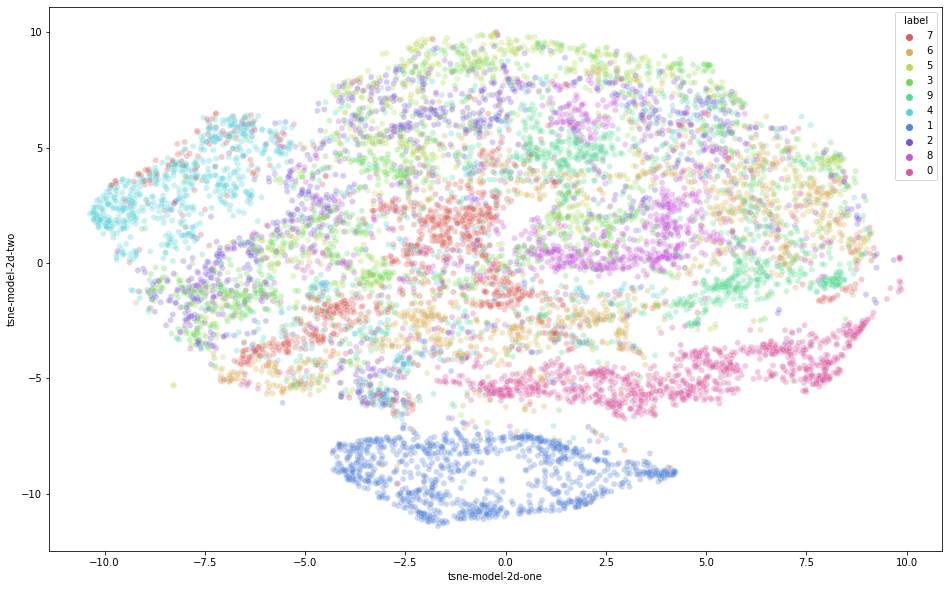

In [117]:
data_df['tsne-model-2d-one'] = tsne_results[:,0]
data_df['tsne-model-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-model-2d-one", y="tsne-model-2d-two",
    hue="label",
    palette = sns.color_palette("hls",10),
    data = data_df,
    legend = "full",
    alpha = 0.3
)

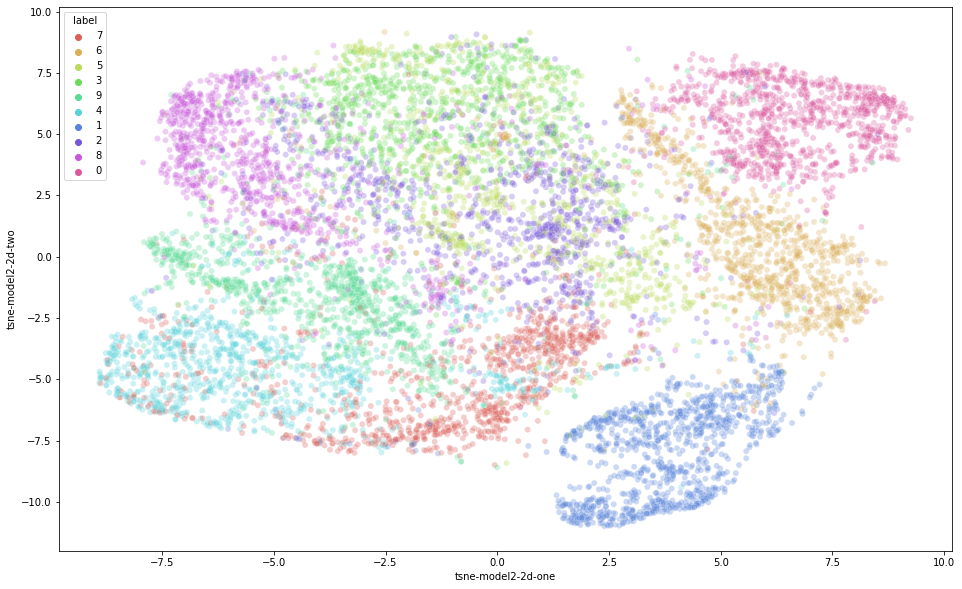

In [138]:
data_df['tsne-model2-2d-one'] = tsne_results[:,0]
data_df['tsne-model2-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-model2-2d-one", y="tsne-model2-2d-two",
    hue="label",
    palette = sns.color_palette("hls",10),
    data = data_df,
    legend = "full",
    alpha = 0.3
)

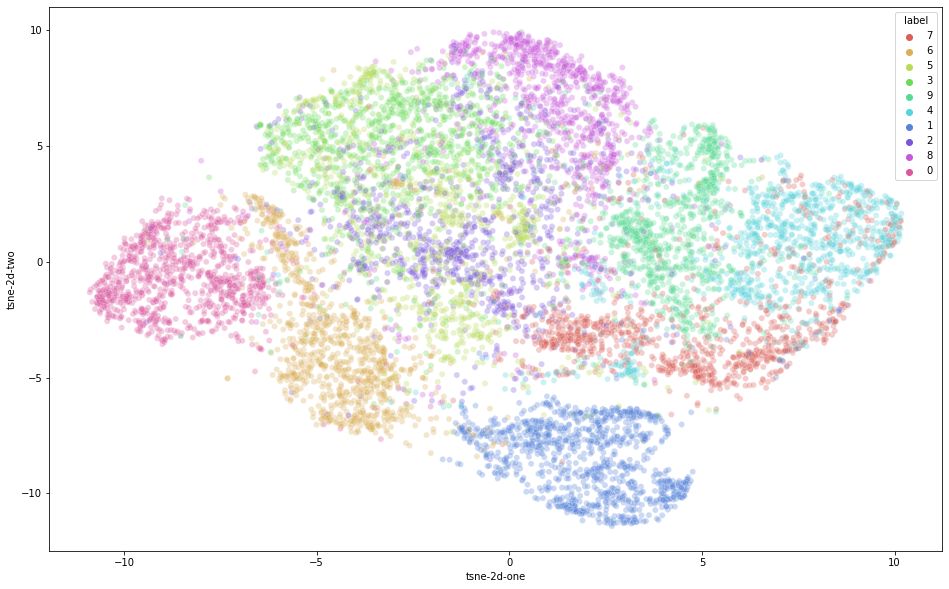

In [47]:
#resnet_ 
data_df['tsne-2d-one'] = tsne_results[:,0]
data_df['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette = sns.color_palette("hls",10),
    data = data_df,
    legend = "full",
    alpha = 0.3
)

In [48]:
N = 10000

df_subset = df.loc[rndperm[:N],:].copy()
print(df_subset.shape)

data_subeset = df_subset[feat_cols].values

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subeset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

(10000, 788)
Explained variation per principal component: [0.09786323 0.07103737 0.06156952]


In [49]:
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1,perplexity= 40, n_iter = 250)
tsne_results = tsne.fit_transform(data_subeset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 2.162s...
[t-SNE] Computed neighbors for 10000 samples in 150.558s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.129510
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.734680
[t-SNE] KL divergence after 251 iterations: 17976931348623157081452742373170